In [15]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import mse
from array import array

In [16]:
DF = pd.read_csv("418.csv")
DF.head()

,Address,Bedrooms,Bathrooms,Rent,Total Area,Price per sqft,Type of house,Transit Score
0,1274 W Lexington St,6,4.0,1200000,3562,336.889388,Luxury,74
1,215 N Aberdeen St UNIT 403A,1,1.0,299100,800,373.875000,Single Family,78
2,331 S Peoria St APT 205,2,2.5,441700,1500,294.466667,Single Family,87
3,843 S Miller St,2,1.0,365700,856,427.219626,Single Family,75
4,215 N Green St #2,3,2.5,9000,3000,3.000000,Other,78


In [17]:
X = DF[["Bedrooms","Bathrooms","Total Area","Price per sqft","Transit Score"]]
y = DF[["Rent"]]

x_scale = StandardScaler()
y_scale = StandardScaler()

#y = y.reshape(-1,1)
X = x_scale.fit_transform(X)
y = y_scale.fit_transform(y)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.3,random_state=1)

In [49]:

svmMachine = svm.SVR(kernel='rbf',C = 100,gamma = 'auto')
svmMachine.fit(X_train,y_train)
y_pred = svmMachine.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


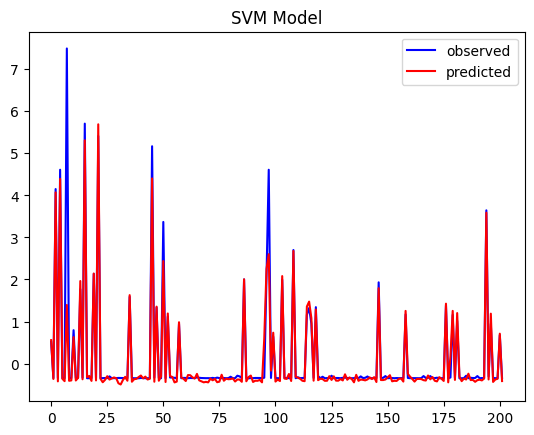

0.930111946391034


In [50]:
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'observed',color = "blue")
plt.plot(x_ax,y_pred, label = 'predicted',color = "red")
plt.title('SVM Model') # adding a tittle to our plot

plt.legend()
plt.show() 

print(svmMachine.score(X,y))
